# SALES ANALYSIS - Phân tích doan số

In [21]:
import pandas as pd

# Read the CSV file
file_path = '/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/cleaned_data/df_revenue_clean.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/2907315043.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12


## Xu hướng doanh số theo thời gian

### Doanh số theo tháng 

Chi tiết doanh số theo tháng (Dữ liệu bao gồm cả năm 2010 và 2011):
MonthYear
2010-12     821452.730
2011-01     689811.610
2011-02     522545.560
2011-03     716215.260
2011-04     536968.491
2011-05     769296.610
2011-06     760547.010
2011-07     718076.121
2011-08     757841.380
2011-09    1056435.192
2011-10    1151263.730
2011-11    1503866.780
2011-12     637790.330
Freq: M, Name: TotalAmount, dtype: float64

Top 3 tháng có doanh số cao nhất:
MonthYear
2011-11    1503866.780
2011-10    1151263.730
2011-09    1056435.192
Freq: M, Name: TotalAmount, dtype: float64

Top 3 tháng có doanh số thấp nhất:
MonthYear
2011-02    522545.560
2011-04    536968.491
2011-12    637790.330
Freq: M, Name: TotalAmount, dtype: float64


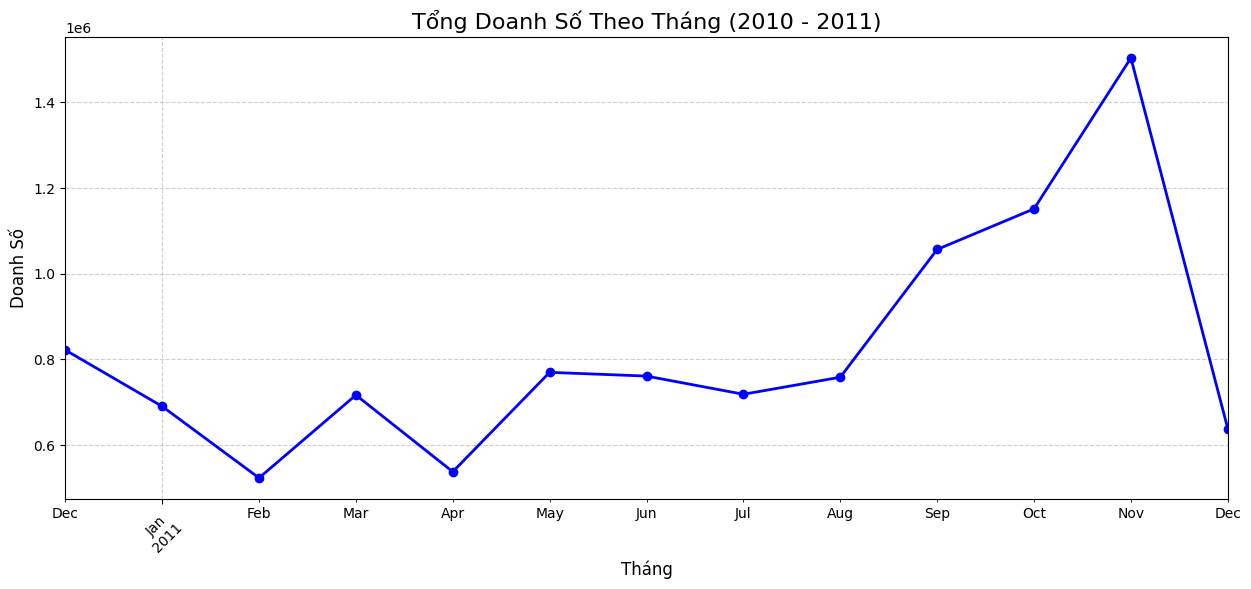

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# 2. Doanh số theo tháng (Monthly Sales)
monthly_sales = df.groupby('MonthYear')['TotalAmount'].sum()

# In thống kê chi tiết
print("Chi tiết doanh số theo tháng (Dữ liệu bao gồm cả năm 2010 và 2011):")
print(monthly_sales)

# Top 3 cao nhất
top_3_months = monthly_sales.sort_values(ascending=False).head(3)
print("\nTop 3 tháng có doanh số cao nhất:")
print(top_3_months)

# Top 3 thấp nhất
top_3_lowest_months = monthly_sales.sort_values(ascending=True).head(3)
print("\nTop 3 tháng có doanh số thấp nhất:")
print(top_3_lowest_months)

# Visualization
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Tổng Doanh Số Theo Tháng (2010 - 2011)', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

Doanh số đạt đỉnh trong ba tháng liên tiếp: September, October và November 2011, với November 2011 là tháng cao nhất (1.50M GBP).

Doanh số thấp nhất rơi vào February và April 2011, thể hiện giai đoạn trầm lắng đầu năm.

Từ May đến August 2011, doanh số duy trì mức ổn định và tăng nhẹ trước khi tăng mạnh vào Q4.

December 2010 cao hơn December 2011, nhưng December 2011 chỉ ghi nhận dữ liệu đến ngày 09/12 nên không thể so sánh trọn vẹn.

Tổng thể, doanh số trong năm 2011 thể hiện xu hướng tăng dần từ đầu năm và đạt đỉnh vào cuối năm, tạo ra một mô hình seasonality rõ rệt.

### Doanh số theo tuần

Chi tiết doanh số theo tuần:
           WeekLabel  TotalAmount
0  Tuần 1 - T12/2010    184669.47
1  Tuần 2 - T12/2010    329108.22
2  Tuần 3 - T12/2010    215357.04
3  Tuần 4 - T12/2010     92318.00
4   Tuần 1 - T1/2011         0.00

Top 3 tuần có doanh số cao nhất:
            WeekLabel  TotalAmount
53  Tuần 2 - T12/2011    503767.75
50  Tuần 3 - T11/2011    387064.65
49  Tuần 2 - T11/2011    368996.32

Top 3 tuần có doanh số thấp nhất:
            WeekLabel  TotalAmount
4    Tuần 1 - T1/2011         0.00
21   Tuần 1 - T5/2011     86364.58
3   Tuần 4 - T12/2010     92318.00


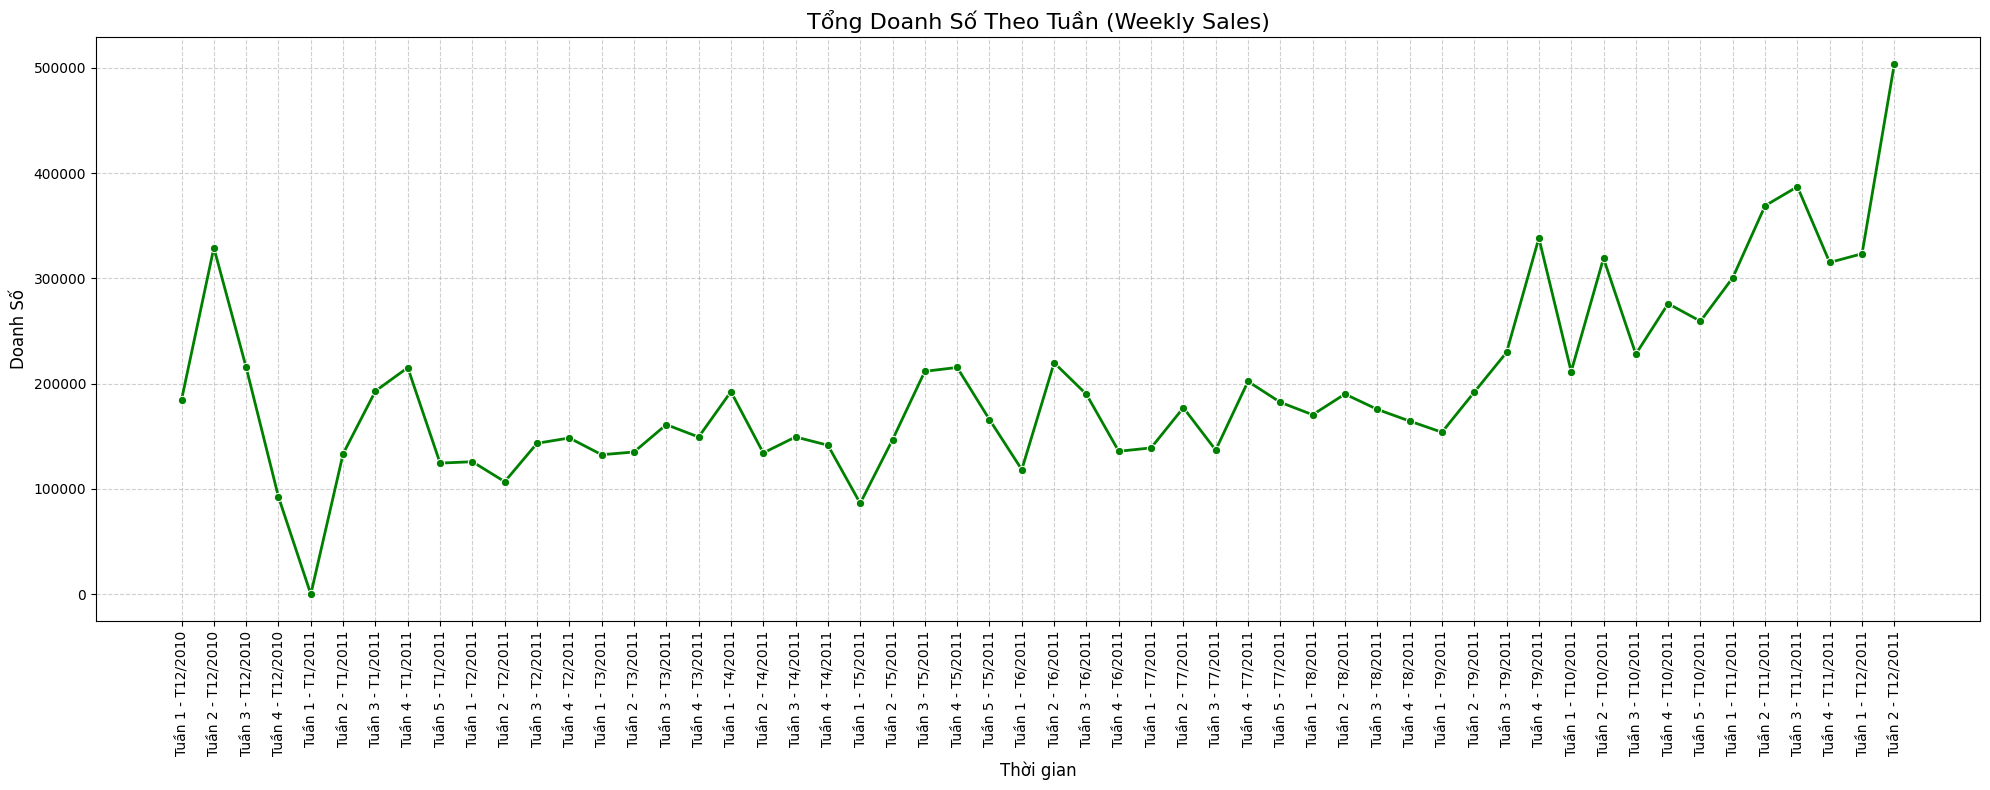

In [23]:
# 3. Doanh số theo tuần (Weekly Sales)
# Resample theo tuần và reset index để có thể thao tác với cột ngày tháng
weekly_sales = df.set_index('InvoiceDate').resample('W')['TotalAmount'].sum().reset_index()

# Tạo cột nhãn hiển thị dạng "Tuần X - T.Y/Năm"
# Công thức (day - 1) // 7 + 1 dùng để ước lượng tuần thứ mấy trong tháng (1-7: Tuần 1, 8-14: Tuần 2...)
weekly_sales['WeekLabel'] = weekly_sales['InvoiceDate'].apply(
    lambda x: f"Tuần {(x.day - 1) // 7 + 1} - T{x.month}/{x.year}"
)

# In thống kê chi tiết
print("Chi tiết doanh số theo tuần:")
print(weekly_sales[['WeekLabel', 'TotalAmount']].head())

# top 3 tuần cao nhất
top_3_weeks = weekly_sales.sort_values(by='TotalAmount', ascending=False).head(3)
print("\nTop 3 tuần có doanh số cao nhất:")
print(top_3_weeks[['WeekLabel', 'TotalAmount']])

# top 3 tuần thấp nhất
top_3_lowest_weeks = weekly_sales.sort_values(by='TotalAmount', ascending=True).head(3)
print("\nTop 3 tuần có doanh số thấp nhất:")
print(top_3_lowest_weeks[['WeekLabel', 'TotalAmount']])

plt.figure(figsize=(20, 8)) # Tăng kích thước ngang để đủ chỗ cho các nhãn
sns.lineplot(data=weekly_sales, x='WeekLabel', y='TotalAmount', color='green', marker='o', linewidth=2)

plt.title('Tổng Doanh Số Theo Tuần (Weekly Sales)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Xoay nhãn trục X 90 độ để hiển thị hết tên các tuần mà không bị đè lên nhau
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Các tuần có doanh số cao nhất tập trung vào giai đoạn cuối năm 2011, đặc biệt là Tuần 2 và Tuần 3 của tháng 11 và 12/2011. Tuần cao nhất là Tuần 2 – Tháng 12/2011, đạt 503,767.75 GBP.

Các tuần thấp điểm gồm:

Tuần 1 – Tháng 1/2011 với giá trị 0 GBP (không có giao dịch).

Tuần 1 – Tháng 5/2011 và Tuần 4 – Tháng 12/2010, có doanh số ở mức khá thấp (xấp xỉ 86K – 92K GBP).

Doanh số theo tuần cho thấy xu hướng tăng mạnh vào các tuần của tháng 11 và đầu tháng 12, đồng nhất với mô hình tăng trưởng cuối năm quan sát được trong phân tích theo tháng.

Ngược lại, đầu năm và một số tuần của mùa Xuân có doanh số thấp hơn rõ rệt.

### Mùa cao điểm và thấp điểm

In [24]:
# 4. Tìm mùa cao điểm / thấp điểm
max_month = monthly_sales.idxmax()
max_value = monthly_sales.max()

min_month = monthly_sales.idxmin()
min_value = monthly_sales.min()

print(f"📈 Mùa cao điểm nhất: {max_month} với doanh số {max_value:,.0f}")
print(f"📉 Mùa thấp điểm nhất: {min_month} với doanh số {min_value:,.0f}")

📈 Mùa cao điểm nhất: 2011-11 với doanh số 1,503,867
📉 Mùa thấp điểm nhất: 2011-02 với doanh số 522,546


### So sánh doanh số 2010 vs 2011

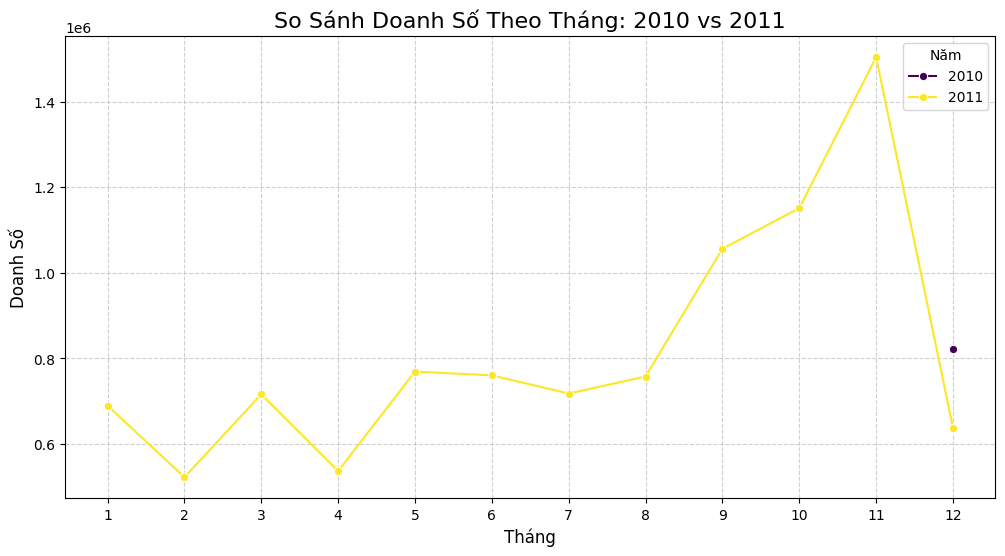

In [25]:
# 5. Doanh số 2010 vs 2011
# Group by Year and Month to compare
sales_by_year_month = df.groupby([df['InvoiceDate'].dt.year.rename('Year'), df['InvoiceDate'].dt.month.rename('Month')])['TotalAmount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_month, x='Month', y='TotalAmount', hue='Year', palette='viridis', marker='o')
plt.title('So Sánh Doanh Số Theo Tháng: 2010 vs 2011', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Số', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Năm')
plt.show()

Tập trung vào tháng 11-12: Những mùa sale cuối năm, có những đợt sale lớn như Black Friday...

=> Tệp khách hàng thích sale, họ nhìn nhận sản phẩm chỉ đáng tiền với giá sale.

## Doanh số theo quốc gia

### Top Quốc gia theo doanh thu

Top 10 Quốc gia có doanh thu cao nhất:
Country
United Kingdom    9001744.094
Netherlands        285446.340
EIRE               283140.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57067.600
Belgium             41196.340
Sweden              38367.830
Name: TotalAmount, dtype: float64


/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/4210389459.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


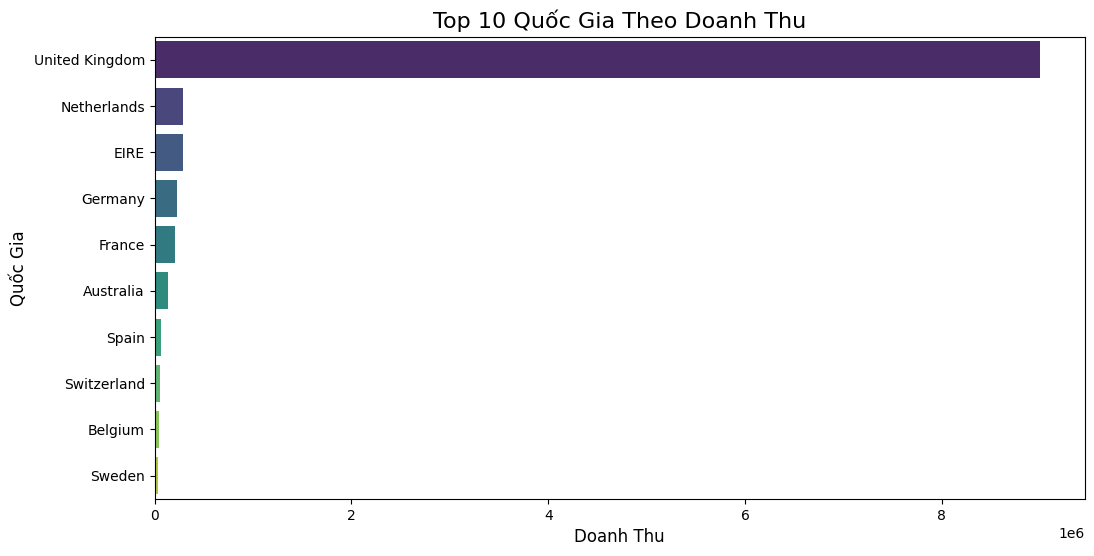

In [26]:

# Tính tổng doanh thu theo quốc gia
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Lấy Top 10
top_10_countries = country_sales.head(10)
print("Top 10 Quốc gia có doanh thu cao nhất:")
print(top_10_countries)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Quốc Gia Theo Doanh Thu', fontsize=16)
plt.xlabel('Doanh Thu', fontsize=12)
plt.ylabel('Quốc Gia', fontsize=12)
plt.show()

# Xu hướng tăng/giảm của các quốc gia (Top 5 non-UK)

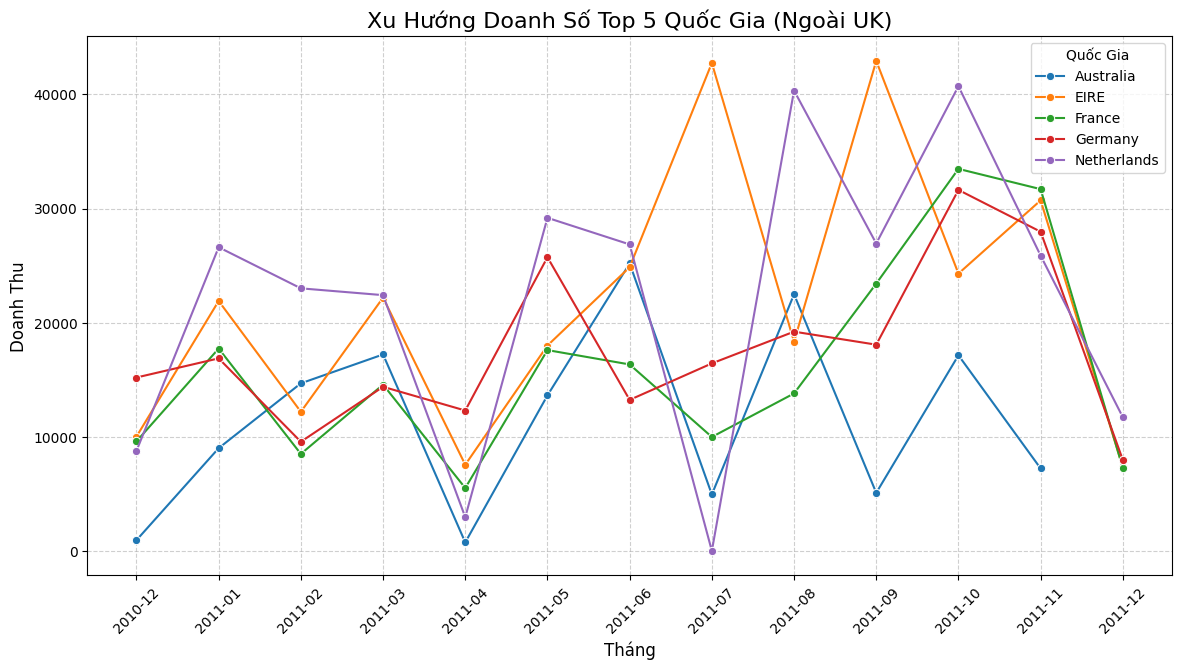

In [27]:

# Lấy top 5 quốc gia doanh thu cao nhất (trừ UK vì UK quá lớn)
top_countries_non_uk = country_sales.drop('United Kingdom').head(5).index.tolist()

# Lọc dữ liệu cho các quốc gia này
df_top_countries = df[df['Country'].isin(top_countries_non_uk)]

# Group theo tháng và quốc gia
country_monthly_sales = df_top_countries.groupby(['MonthYear', 'Country'])['TotalAmount'].sum().reset_index()
# Chuyển MonthYear sang string để vẽ cho đúng thứ tự
country_monthly_sales['MonthYear'] = country_monthly_sales['MonthYear'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=country_monthly_sales, x='MonthYear', y='TotalAmount', hue='Country', marker='o')
plt.title('Xu Hướng Doanh Số Top 5 Quốc Gia (Ngoài UK)', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Thu', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Quốc Gia')
plt.show()

### Tỷ lệ huỷ đơn ở các quốc gia

Top 10 Quốc gia có tỷ lệ huỷ đơn hàng cao nhất:
Country
USA               0.384880
Czech Republic    0.166667
Malta             0.118110
Japan             0.103352
Saudi Arabia      0.100000
Australia         0.058964
Italy             0.056040
Bahrain           0.052632
Germany           0.047795
EIRE              0.036797
Name: count, dtype: float64


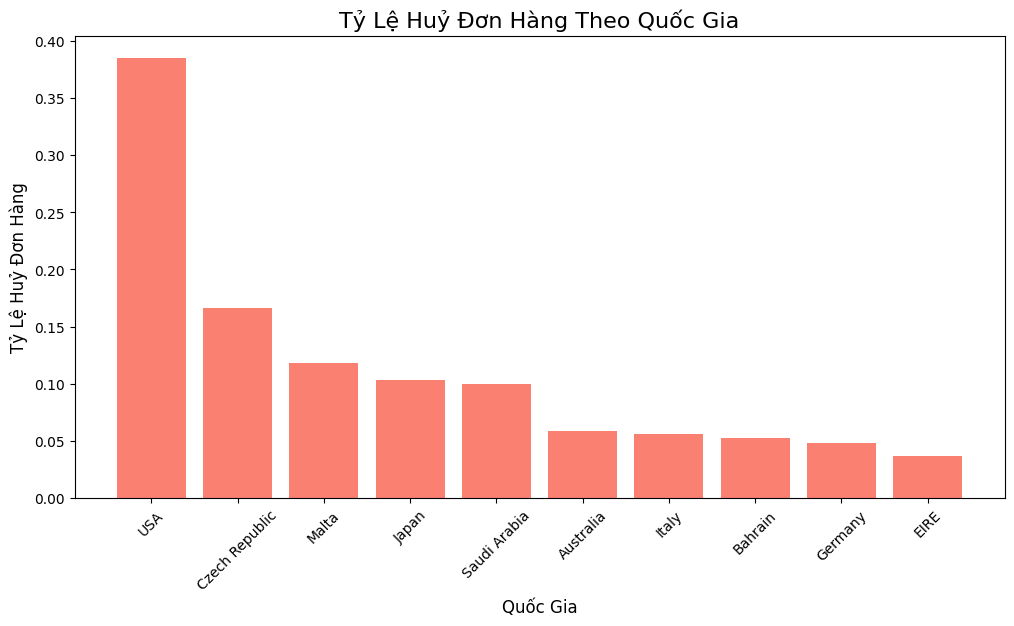

In [28]:
# Tỷ lệ huỷ đơn hàng theo quốc gia
df_cancelled = pd.read_csv('../data_process/cleaned_data/df_cancelled.csv')
country_cancel_count = df_cancelled['Country'].value_counts()
country_total_count = df['Country'].value_counts() + country_cancel_count

cancel_rate_by_country = (country_cancel_count / country_total_count).sort_values(ascending=False)
top_10_cancel_rate = cancel_rate_by_country.head(10)
print("Top 10 Quốc gia có tỷ lệ huỷ đơn hàng cao nhất:")
print(top_10_cancel_rate)
# Vẽ biểu đồ tỷ lệ huỷ đơn hàng
plt.figure(figsize=(12, 6))
plt.bar(top_10_cancel_rate.index, top_10_cancel_rate.values, color='salmon')
plt.title('Tỷ Lệ Huỷ Đơn Hàng Theo Quốc Gia', fontsize=16)
plt.xlabel('Quốc Gia', fontsize=12)
plt.ylabel('Tỷ Lệ Huỷ Đơn Hàng', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Doanh thu hao hụt theo quốc gia

Top 10 Quốc gia có doanh thu hao hụt từ đơn hàng bị huỷ cao nhất:
Country
United Kingdom    812491.79
EIRE               20147.14
France             12308.26
Singapore          12158.90
Germany             7168.93
Spain               6802.53
Hong Kong           5574.76
Portugal            4380.08
Japan               2075.75
USA                 1849.47
Name: TotalAmount, dtype: float64


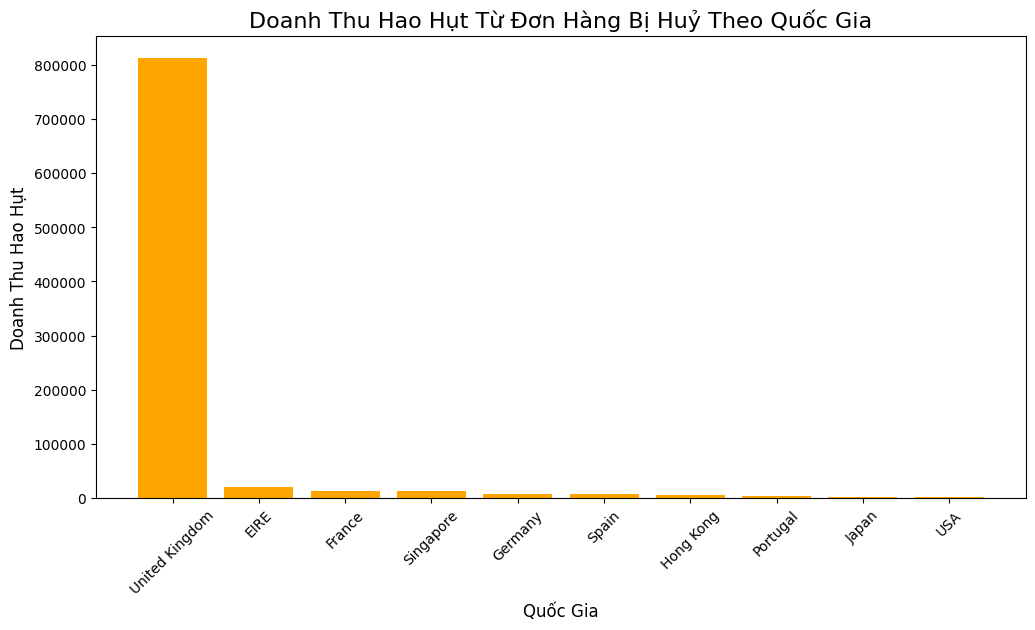

In [29]:
# Doanh thu hao hụt từ đơn hàng bị huỷ theo quốc gia
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df_cancelled['TotalAmount'] = abs(df_cancelled['Quantity'] * df_cancelled['UnitPrice'])
cancelled_revenue_by_country = df_cancelled.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
top_10_cancelled_revenue = cancelled_revenue_by_country.head(10)
print("Top 10 Quốc gia có doanh thu hao hụt từ đơn hàng bị huỷ cao nhất:")
print(top_10_cancelled_revenue)
# Vẽ biểu đồ doanh thu hao hụt
plt.figure(figsize=(12, 6))
plt.bar(top_10_cancelled_revenue.index, top_10_cancelled_revenue.values, color='orange')
plt.title('Doanh Thu Hao Hụt Từ Đơn Hàng Bị Huỷ Theo Quốc Gia', fontsize=16)
plt.xlabel('Quốc Gia', fontsize=12)
plt.ylabel('Doanh Thu Hao Hụt', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Tỷ lệ thấp nhưng hao hụt nhiều => Do mua nhiều đơn (UK)

ÚSA mua ít, tỷ lệ cao nhưng hao hụt ít

## Doanh thu mất từ đơn hoàn trả

Doanh số hao hụt do đơn hàng bị huỷ: 893,980 (7.75%)


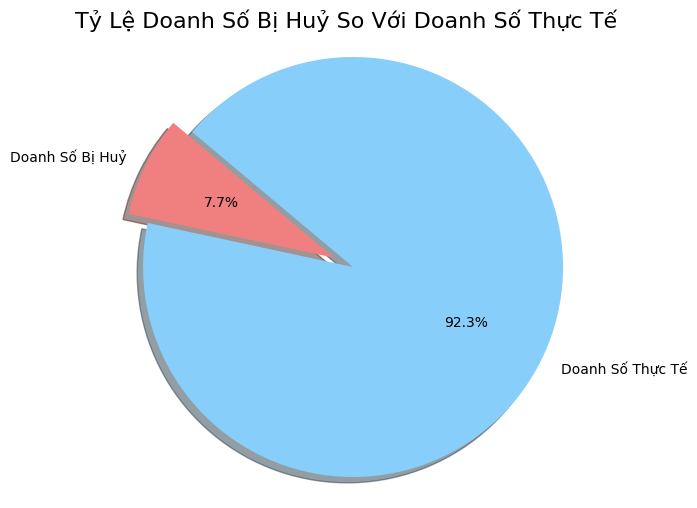

In [30]:
# Doanh số hao hụt do đơn hàng bị huỷ
cancelled_revenue = df_cancelled['TotalAmount'].sum()
total_revenue = df['TotalAmount'].sum() + cancelled_revenue
loss_percentage = (cancelled_revenue / total_revenue) * 100
print(f"Doanh số hao hụt do đơn hàng bị huỷ: {cancelled_revenue:,.0f} ({loss_percentage:.2f}%)")

plt.figure(figsize=(8, 6))
labels = ['Doanh Số Bị Huỷ', 'Doanh Số Thực Tế']
sizes = [cancelled_revenue, total_revenue - cancelled_revenue]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # "explode" the 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Tỷ Lệ Doanh Số Bị Huỷ So Với Doanh Số Thực Tế', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Top 10 Sản Phẩm Bị Trả Nhiều Nhất:
Description
Manual                               244
REGENCY CAKESTAND 3 TIER             180
POSTAGE                              126
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      73
SAMPLES                               60
ROSES REGENCY TEACUP AND SAUCER       54
STRAWBERRY CERAMIC TRINKET BOX        54
RECIPE BOX PANTRY YELLOW DESIGN       47
Name: count, dtype: int64


/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/379535251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_returned_products.values, y=top_returned_products.index, palette='magma')


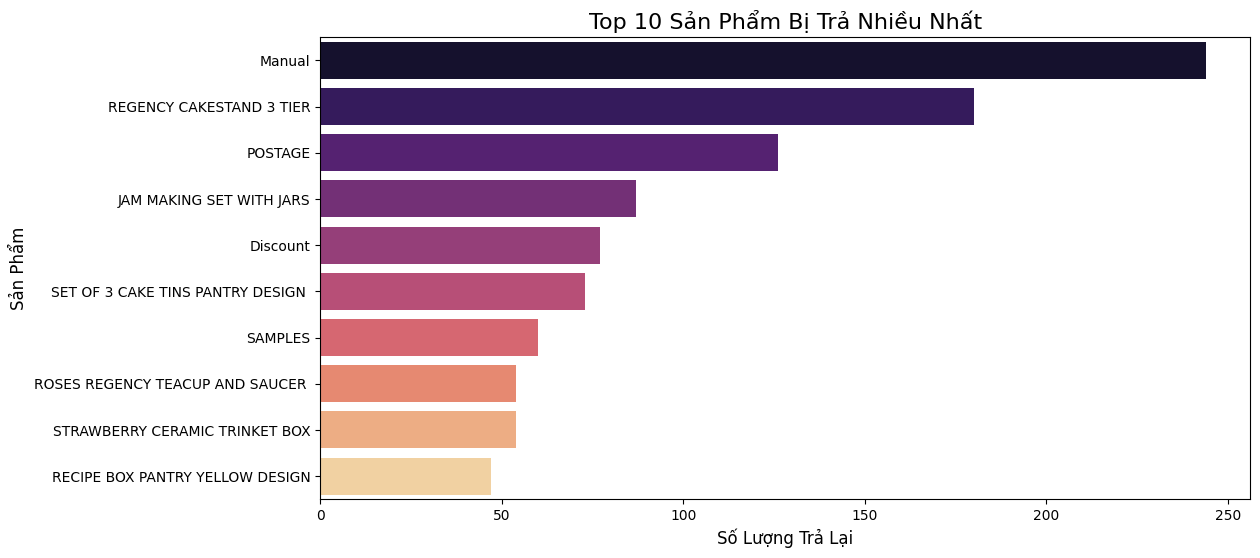

In [31]:
# Các sản phẩm bị trả nhiều nhất
top_returned_products = df_cancelled['Description'].value_counts().head(10)
print("Top 10 Sản Phẩm Bị Trả Nhiều Nhất:")
print(top_returned_products)    

# Vẽ biểu đồ các sản phẩm bị trả nhiều nhất
plt.figure(figsize=(12, 6))
sns.barplot(x=top_returned_products.values, y=top_returned_products.index, palette='magma')
plt.title('Top 10 Sản Phẩm Bị Trả Nhiều Nhất', fontsize=16)
plt.xlabel('Số Lượng Trả Lại', fontsize=12)
plt.ylabel('Sản Phẩm', fontsize=12)
plt.show()  

# Product Analysis

## Sản phẩm bán chạy nhất

Top 10 Sản phẩm bán chạy nhất (theo Số lượng):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
JUMBO BAG RED RETROSPOT               48371
WHITE HANGING HEART T-LIGHT HOLDER    37872
POPCORN HOLDER                        36749
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         36362
RABBIT NIGHT LIGHT                    30739
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

Top 10 Sản phẩm doanh thu cao nhất:
Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174156.54
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POSTAGE                                78101.88
Manual                                 

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/4102584669.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_qty.values, y=top_products_qty.index, ax=axes[0], palette='Blues_r')
/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/4102584669.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_rev.values, y=top_products_rev.index, ax=axes[1], palette='Greens_r')


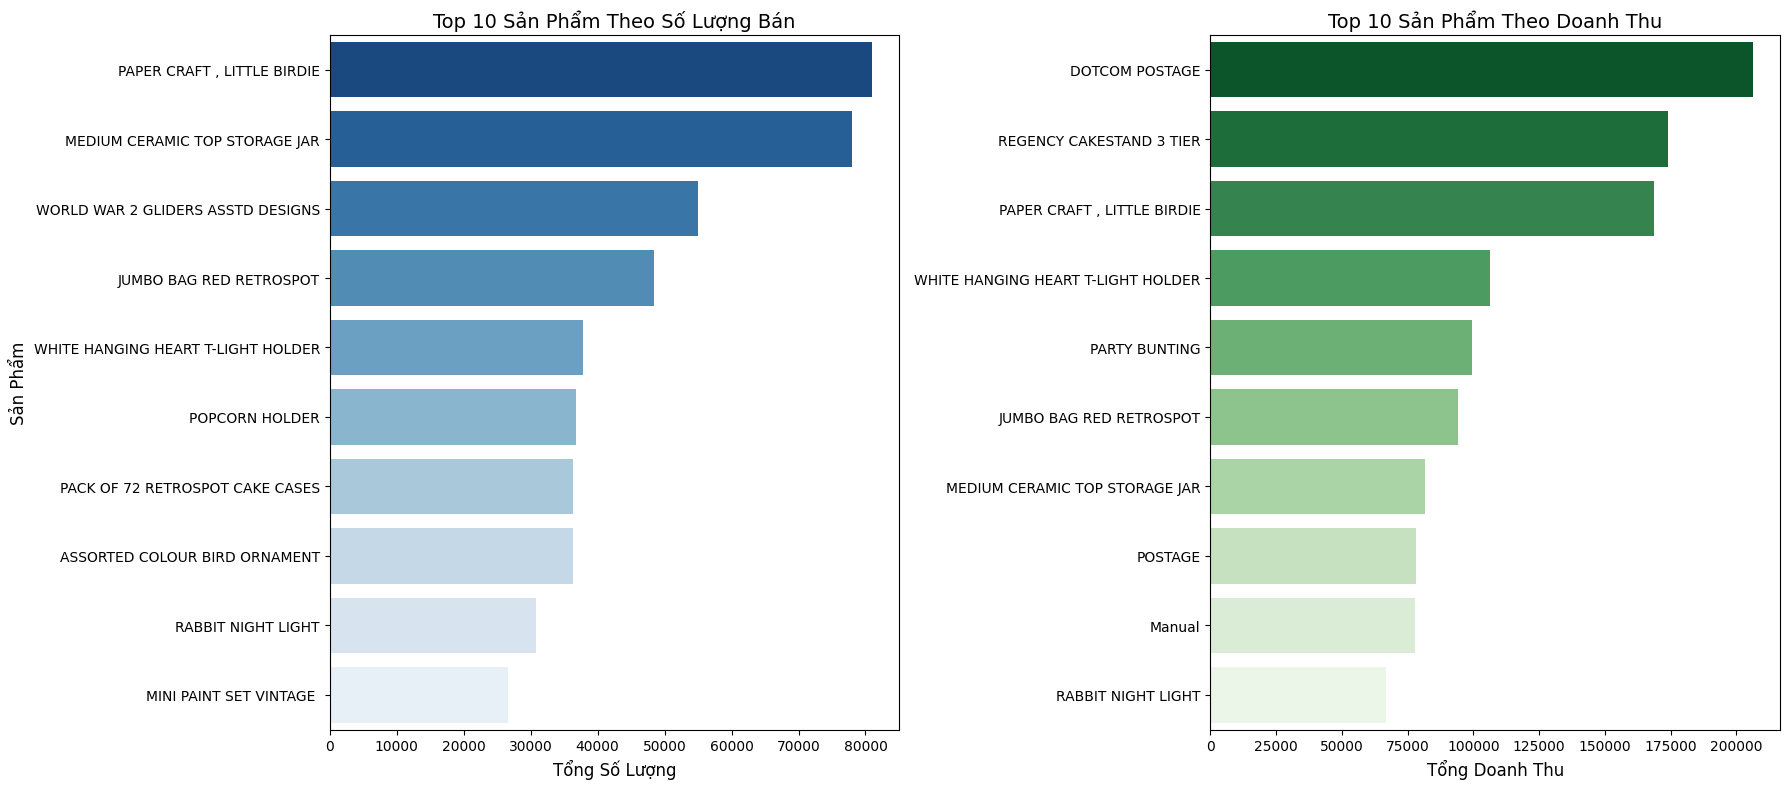

In [32]:
# Top 10 sản phẩm theo số lượng bán ra
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top 10 sản phẩm theo doanh thu
top_products_rev = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

print("Top 10 Sản phẩm bán chạy nhất (theo Số lượng):")
print(top_products_qty)
print("\nTop 10 Sản phẩm doanh thu cao nhất:")
print(top_products_rev)

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Biểu đồ theo số lượng
sns.barplot(x=top_products_qty.values, y=top_products_qty.index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Sản Phẩm Theo Số Lượng Bán', fontsize=14)
axes[0].set_xlabel('Tổng Số Lượng', fontsize=12)
axes[0].set_ylabel('Sản Phẩm', fontsize=12)

# Biểu đồ theo doanh thu
sns.barplot(x=top_products_rev.values, y=top_products_rev.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 10 Sản Phẩm Theo Doanh Thu', fontsize=14)
axes[1].set_xlabel('Tổng Doanh Thu', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

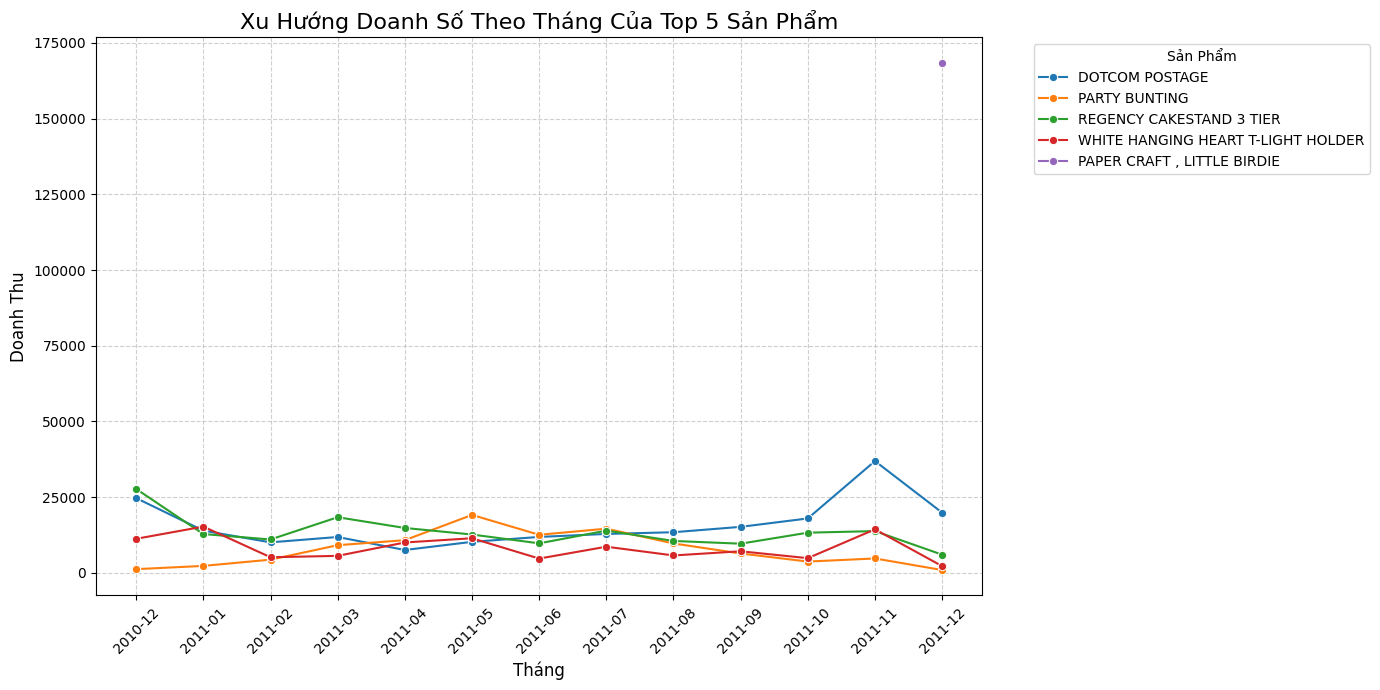

In [33]:
# Mùa cao điểm cho các sản phẩm nổi bật (Top 5 theo doanh thu)
top_5_revenue_products = top_products_rev.head(5).index.tolist()
df_top_products = df[df['Description'].isin(top_5_revenue_products)]

# Group theo tháng và sản phẩm
product_monthly_trends = df_top_products.groupby(['MonthYear', 'Description'])['TotalAmount'].sum().reset_index()
product_monthly_trends['MonthYear'] = product_monthly_trends['MonthYear'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=product_monthly_trends, x='MonthYear', y='TotalAmount', hue='Description', marker='o')
plt.title('Xu Hướng Doanh Số Theo Tháng Của Top 5 Sản Phẩm', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh Thu', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sản Phẩm')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Hành vi mua lại sản phẩm (Repurchase)

Top 10 Sản phẩm có tỷ lệ mua lại cao nhất (trên tập sản phẩm phổ biến):
Description
POSTAGE                        57.228916
LUNCH BAG RED RETROSPOT        51.969981
LUNCH BAG WOODLAND             50.402145
LUNCH BAG  BLACK SKULL.        50.108932
CHARLOTTE BAG APPLES DESIGN    50.000000
JUMBO BAG RED RETROSPOT        49.213836
LUNCH BAG SUKI DESIGN          49.000000
ALARM CLOCK BAKELIKE GREEN     48.606811
ALARM CLOCK BAKELIKE RED       48.586118
WOODLAND CHARLOTTE BAG         48.117155
Name: CustomerID, dtype: float64


/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/3155915822.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_repurchase.values, y=top_10_repurchase.index, palette='Purples_r')


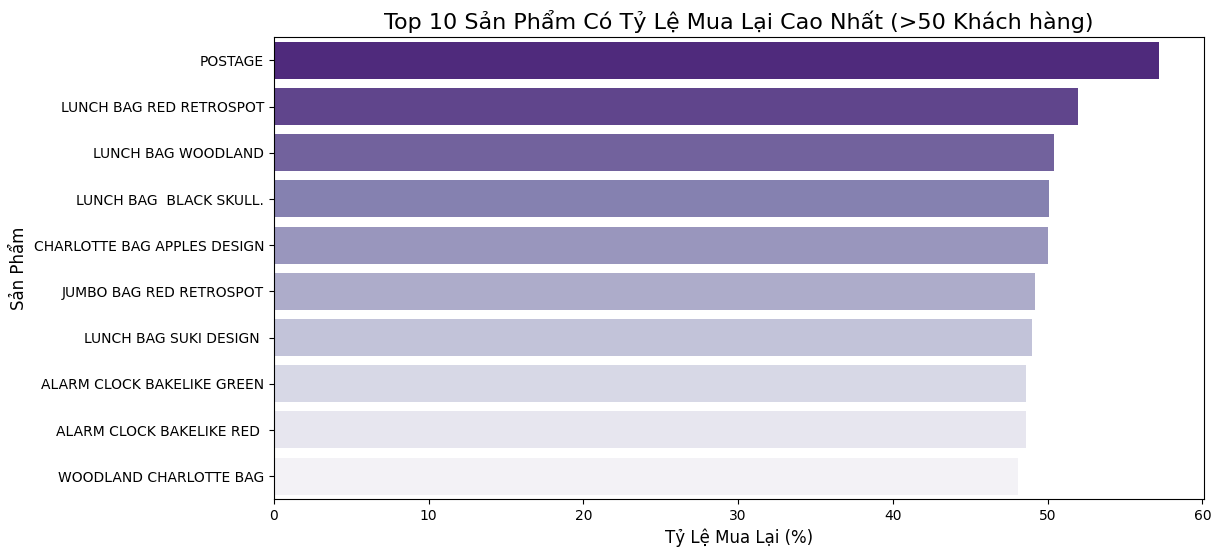

In [34]:

# Chỉ xét các giao dịch có CustomerID (để xác định khách hàng)
df_customer_valid = df.dropna(subset=['CustomerID'])

# Đếm số lần mua (số Invoice khác nhau) của mỗi khách hàng cho mỗi sản phẩm
# Group by CustomerID và Description, đếm unique InvoiceNo
customer_product_counts = df_customer_valid.groupby(['CustomerID', 'Description'])['InvoiceNo'].nunique().reset_index()
customer_product_counts.rename(columns={'InvoiceNo': 'PurchaseCount'}, inplace=True)

# Xác định khách hàng mua lại (PurchaseCount > 1)
repurchase_customers = customer_product_counts[customer_product_counts['PurchaseCount'] > 1]

# Tính tỷ lệ mua lại cho từng sản phẩm
# 1. Tổng số khách hàng mua sản phẩm đó
total_customers_per_product = customer_product_counts.groupby('Description')['CustomerID'].nunique()

# 2. Số khách hàng mua lại sản phẩm đó
repurchase_customers_per_product = repurchase_customers.groupby('Description')['CustomerID'].nunique()

# 3. Tính tỷ lệ (%)
repurchase_rate = (repurchase_customers_per_product / total_customers_per_product * 100).fillna(0)

# Lọc những sản phẩm có ít nhất 50 khách hàng mua để đảm bảo ý nghĩa thống kê
significant_products = total_customers_per_product[total_customers_per_product > 50].index
repurchase_rate_filtered = repurchase_rate[repurchase_rate.index.isin(significant_products)].sort_values(ascending=False)

print("Top 10 Sản phẩm có tỷ lệ mua lại cao nhất (trên tập sản phẩm phổ biến):")
print(repurchase_rate_filtered.head(10))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
top_10_repurchase = repurchase_rate_filtered.head(10)
sns.barplot(x=top_10_repurchase.values, y=top_10_repurchase.index, palette='Purples_r')
plt.title('Top 10 Sản Phẩm Có Tỷ Lệ Mua Lại Cao Nhất (>50 Khách hàng)', fontsize=16)
plt.xlabel('Tỷ Lệ Mua Lại (%)', fontsize=12)
plt.ylabel('Sản Phẩm', fontsize=12)
plt.show()

## Phân bố sản phẩm theo quốc gia

Sản phẩm bán chạy nhất tại Top 5 Quốc gia:

--- United Kingdom ---
Description
DOTCOM POSTAGE                        206248.77
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              141996.09
WHITE HANGING HEART T-LIGHT HOLDER    100444.62
PARTY BUNTING                          93599.43
Name: TotalAmount, dtype: float64

--- Netherlands ---
Description
RABBIT NIGHT LIGHT                     9568.48
ROUND SNACK BOXES SET OF4 WOODLAND     7991.40
SPACEBOY LUNCH BOX                     7485.60
DOLLY GIRL LUNCH BOX                   6828.60
ROUND SNACK BOXES SET OF 4 FRUITS      4039.20
Name: TotalAmount, dtype: float64

--- EIRE ---
Description
REGENCY CAKESTAND 3 TIER         7793.25
Manual                           7049.66
CARRIAGE                         5240.00
3 TIER CAKE TIN RED AND CREAM    4265.55
JAM MAKING SET WITH JARS         3097.50
Name: TotalAmount, dtype: float64

--- Germany ---
Description
POSTAGE                                21001.00
REG

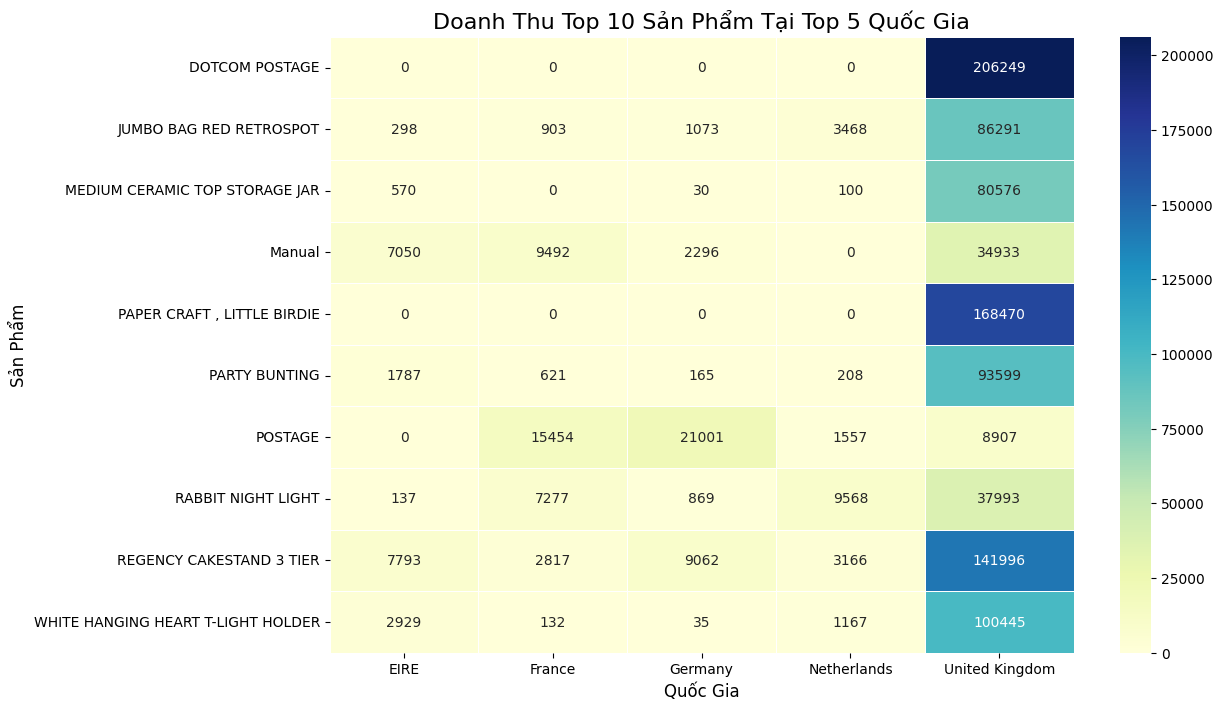

In [35]:

# Tìm sản phẩm bán chạy nhất (theo doanh thu) cho Top 5 quốc gia
top_5_countries = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(5).index.tolist()

print("Sản phẩm bán chạy nhất tại Top 5 Quốc gia:")
for country in top_5_countries:
    print(f"\n--- {country} ---")
    top_prod_country = df[df['Country'] == country].groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(5)
    print(top_prod_country)
    
    # Vẽ biểu đồ nhỏ cho từng quốc gia (Optional, hoặc vẽ gộp)
    # Ở đây in ra text để dễ theo dõi chi tiết

# Trực quan hoá Heatmap cho Top 10 sản phẩm chung và Top 5 quốc gia
# Để xem sự phân bố sở thích
top_10_global_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10).index
df_heatmap = df[df['Country'].isin(top_5_countries) & df['Description'].isin(top_10_global_products)]

pivot_table = df_heatmap.pivot_table(index='Description', columns='Country', values='TotalAmount', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Doanh Thu Top 10 Sản Phẩm Tại Top 5 Quốc Gia', fontsize=16)
plt.xlabel('Quốc Gia', fontsize=12)
plt.ylabel('Sản Phẩm', fontsize=12)
plt.show()

# CUSTOMER ANALYSIS

In [36]:
# Đọc bảng khách hàng
df_customers = pd.read_csv('/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/cleaned_data/df_customer_clean.csv')

# Transaction pattern

Thống kê Tần suất mua hàng:
count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

Thống kê Khoảng thời gian trung bình giữa các lần mua (ngày):
count    4267.000000
mean        3.268696
std        10.872283
min         0.000000
25%         0.000000
50%         1.117647
75%         3.000000
max       309.000000
Name: DaysBetween, dtype: float64


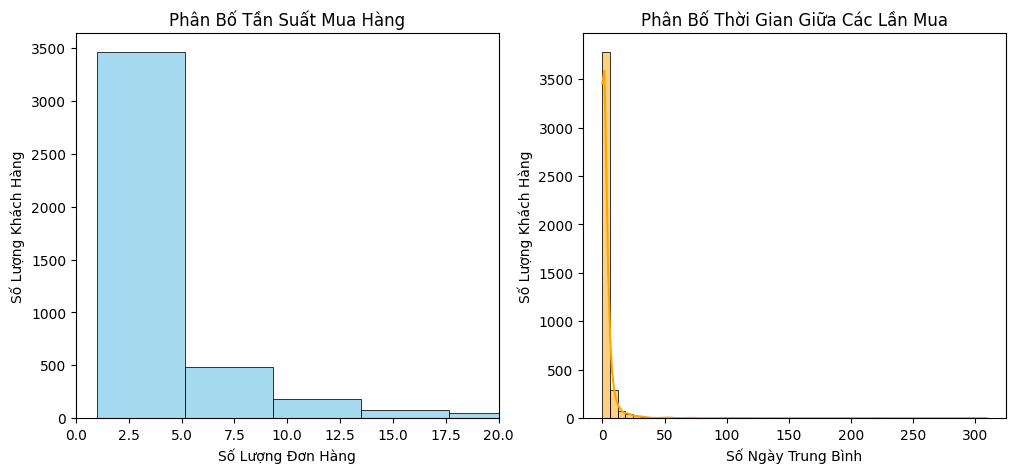

In [37]:
# Ensure InvoiceDate is datetime
df_customers['InvoiceDate'] = pd.to_datetime(df_customers['InvoiceDate'])

# Tần suất mua (Frequency) - Số đơn hàng mỗi khách
purchase_frequency = df_customers.groupby('CustomerID')['InvoiceNo'].nunique()

# Khoảng thời gian giữa các lần mua (Days between purchases)
# Sort data
df_customers_sorted = df_customers.sort_values(['CustomerID', 'InvoiceDate'])
# Shift InvoiceDate to get previous purchase date
df_customers_sorted['PrevInvoiceDate'] = df_customers_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
# Calculate difference
df_customers_sorted['DaysBetween'] = (df_customers_sorted['InvoiceDate'] - df_customers_sorted['PrevInvoiceDate']).dt.days

# Average days between purchases for each customer (excluding NaNs for first purchase)
avg_days_between = df_customers_sorted.groupby('CustomerID')['DaysBetween'].mean()

print("Thống kê Tần suất mua hàng:")
print(purchase_frequency.describe())
print("\nThống kê Khoảng thời gian trung bình giữa các lần mua (ngày):")
print(avg_days_between.describe())

# Visualize Frequency Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(purchase_frequency, bins=50, kde=False, color='skyblue')
plt.title('Phân Bố Tần Suất Mua Hàng')
plt.xlabel('Số Lượng Đơn Hàng')
plt.ylabel('Số Lượng Khách Hàng')
plt.xlim(0, 20) # Zoom in for better view

# Visualize Days Between Distribution
plt.subplot(1, 2, 2)
sns.histplot(avg_days_between.dropna(), bins=50, kde=True, color='orange')
plt.title('Phân Bố Thời Gian Giữa Các Lần Mua')
plt.xlabel('Số Ngày Trung Bình')
plt.ylabel('Số Lượng Khách Hàng')
plt.show()

# Customer spending analysis

Top 10 Khách hàng chi tiêu nhiều nhất:
CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: TotalAmount, dtype: float64


/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/4043430247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_spenders.index.astype(str), y=top_10_spenders.values, palette='coolwarm')


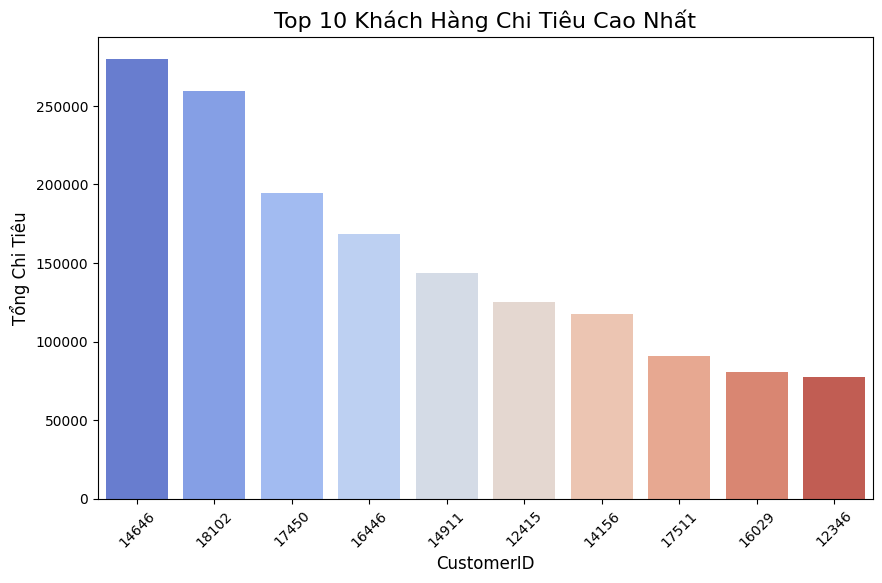

In [38]:
# Chi tiêu theo khách hàng (Monetary)
customer_spending = df_customers.groupby('CustomerID')['TotalAmount'].sum()

# Top 10 khách hàng chi tiêu nhiều nhất
top_10_spenders = customer_spending.sort_values(ascending=False).head(10)
print("Top 10 Khách hàng chi tiêu nhiều nhất:")
print(top_10_spenders)

# Visualize Top 10 Spenders
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_spenders.index.astype(str), y=top_10_spenders.values, palette='coolwarm')
plt.title('Top 10 Khách Hàng Chi Tiêu Cao Nhất', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Tổng Chi Tiêu', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##  Customer segmentation (RFM)

Mẫu dữ liệu RFM:
   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0       12346      326          1  77183.60       1       1       4       114
1       12347        2          7   4310.00       4       4       4       444
2       12348       75          4   1797.24       2       3       4       234
3       12349       19          1   1757.55       3       1       4       314
4       12350      310          1    334.40       1       1       2       112

Số lượng khách hàng theo phân khúc:
Segment
Lost/Low Value    1509
Potential         1236
VIP                876
New/Promising      477
At Risk            240
Name: count, dtype: int64


/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_28405/2459829460.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')


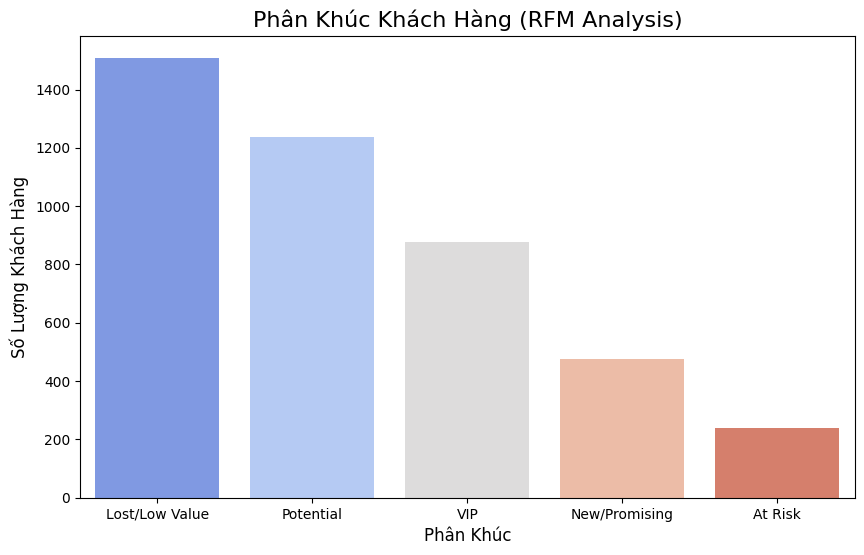

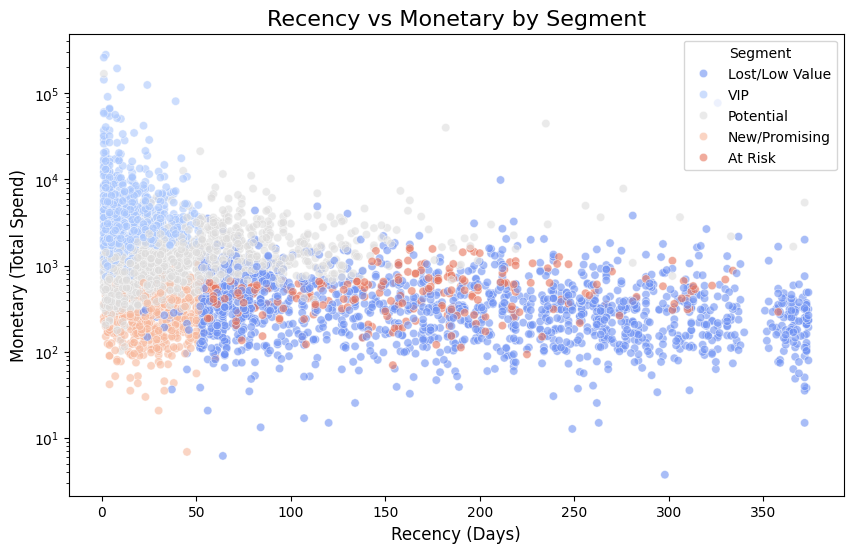

In [39]:

import datetime as dt

# Set reference date (1 day after max date)
ref_date = df_customers['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'TotalAmount': 'sum'                                # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Create RFM Scores (1-4 scale, 4 is best)
# Recency: Lower is better -> labels=[4, 3, 2, 1]
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency: Higher is better -> labels=[1, 2, 3, 4]
# Use rank(method='first') to handle duplicate values if qcut fails
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Monetary: Higher is better -> labels=[1, 2, 3, 4]
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM Scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print("Mẫu dữ liệu RFM:")
print(rfm.head())

# Segment Customers based on RFM Score
def segment_customer(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])
    rfm_score = r + f + m
    
    if rfm_score >= 11:
        return 'VIP' # Best customers
    elif rfm_score >= 8:
        return 'Potential' # Good spenders/frequent
    elif r >= 3 and f <= 2:
        return 'New/Promising' # Recent but low freq
    elif r <= 2 and f >= 3:
        return 'At Risk' # Frequent but haven't bought lately
    else:
        return 'Lost/Low Value'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Count segments
segment_counts = rfm['Segment'].value_counts()
print("\nSố lượng khách hàng theo phân khúc:")
print(segment_counts)

# Visualize Segments
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.title('Phân Khúc Khách Hàng (RFM Analysis)', fontsize=16)
plt.xlabel('Phân Khúc', fontsize=12)
plt.ylabel('Số Lượng Khách Hàng', fontsize=12)
plt.show()

# Scatter plot: Recency vs Monetary colored by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='coolwarm', alpha=0.6)
plt.title('Recency vs Monetary by Segment', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary (Total Spend)', fontsize=12)
plt.yscale('log') # Log scale for Monetary due to skewness
plt.show()

# Báo Cáo Insight Phân Tích Dữ Liệu (Data Analysis Insights)

## 1. Phân Tích Doanh Số (Sales Analysis)

### Xu hướng theo thời gian (Seasonality)
- **Mùa cao điểm (Peak Season):** Doanh số có tính mùa vụ rất mạnh, tập trung vào Quý 4.
  - **Đỉnh điểm:** Tháng 11/2011 đạt doanh số cao nhất (1.5 triệu GBP).
  - **Giai đoạn vàng:** Ba tháng liên tiếp (Tháng 9, 10, 11) đều duy trì mức doanh thu cao.
  - **Chi tiết tuần:** Tuần 2 và Tuần 3 của tháng 12/2011 ghi nhận sức mua lớn nhất, phản ánh nhu cầu mua sắm quà tặng Giáng sinh và Năm mới.
- **Mùa thấp điểm:** Tháng 2/2011 là thời điểm doanh số chạm đáy (~522k GBP).

### Hiệu suất theo thị trường (Market Performance)
- **Thị trường chủ lực:** Vương quốc Anh (UK) chiếm tỷ trọng áp đảo với tổng doanh thu khoảng 9 triệu GBP.
- **Thị trường tiềm năng (Non-UK):**
  - Hà Lan (Netherlands)
  - EIRE (Ireland)
  - Đức (Germany)
  - Pháp (France)
  > **Insight:** Đây là nhóm quốc gia cần ưu tiên chiến lược mở rộng thị trường quốc tế.

### Vấn đề Hủy đơn & Hoàn trả (Critical Issues)
- **Tỷ lệ hủy đơn đáng báo động tại Mỹ:**
  - Mỹ (USA) có tỷ lệ hủy đơn lên tới **~38.5%**, cao nhất trong các quốc gia.
  - Mặc dù doanh thu từ Mỹ không đứng đầu, nhưng tỷ lệ hủy này cho thấy vấn đề nghiêm trọng trong khâu vận chuyển (shipping logistics) hoặc kỳ vọng của khách hàng không được đáp ứng.
- **Tác động tài chính:**
  - Tổng doanh thu bị mất do đơn hủy là **~894,000 GBP** (chiếm 7.75% tổng doanh thu).
  - Cộng hòa Séc cũng ghi nhận tỷ lệ hủy cao (~16%).

---

## 2. Phân Tích Sản Phẩm (Product Analysis)

### Sản phẩm bán chạy (Best-Sellers)
- **Về số lượng:** Các mặt hàng thủ công và gia dụng nhỏ, giá rẻ dẫn đầu:
  - *"PAPER CRAFT, LITTLE BIRDIE"* (~81k sản phẩm)
  - *"MEDIUM CERAMIC TOP STORAGE JAR"* (~78k sản phẩm)
- **Đặc điểm:** Khách hàng ưa chuộng các món đồ trang trí nhỏ, dễ làm quà tặng.

### Vấn đề chất lượng (Product Returns)
- **Sản phẩm bị trả nhiều:** *"REGENCY CAKESTAND 3 TIER"* đứng thứ 2 trong danh sách bị trả lại (180 lần), chỉ sau mục lỗi hệ thống "Manual".
  > **Insight:** Tần suất trả hàng cao ở một sản phẩm cụ thể gợi ý vấn đề về chất lượng vật lý (dễ gãy vỡ) hoặc mô tả sản phẩm gây hiểu lầm.

### Hành vi mua lại (Repurchase Behavior)
- **Sản phẩm có độ trung thành cao:**
  - Dòng sản phẩm **"LUNCH BAG"** (túi đựng bữa trưa)
  - Dòng sản phẩm **"ALARM CLOCK"** (đồng hồ báo thức)
  > **Insight:** Tỷ lệ mua lại xấp xỉ 50% cho thấy khách hàng có xu hướng sưu tập các mẫu mã khác nhau hoặc mua số lượng lớn để làm quà tặng.

---

## 3. Phân Tích Khách Hàng (Customer Analysis)

### Hành vi chi tiêu (Spending Behavior)
- **Quy luật Pareto cực đoan:** Có sự chênh lệch khổng lồ giữa nhóm khách hàng top đầu và khách hàng trung bình.
  - Top khách hàng (VD: ID `14646`, `18102`) chi tiêu từ **260,000 - 280,000 GBP**.
  > **Insight:** Những khách hàng này có khả năng cao là các nhà bán buôn (wholesalers), không phải khách lẻ tiêu dùng thông thường. Việc mất đi một trong số họ sẽ ảnh hưởng lớn đến doanh thu.

### Tần suất mua hàng (Frequency)
- **Trung bình:** 4.2 lần/khách.
- **Trung vị (Median):** 2 lần/khách.
  > **Insight:** Phần lớn khách hàng chỉ mua 1-2 lần. Chỉ một nhóm nhỏ khách hàng trung thành mua nhiều lần đang kéo mức trung bình lên.

---

## 4. Khuyến Nghị Hành Động (Actionable Recommendations)

1. **Khắc phục vận chuyển đi Mỹ:** Cần rà soát ngay đối tác vận chuyển và chính sách giao hàng tại thị trường Mỹ để giảm tỷ lệ hủy 38.5%.
2. **Kiểm soát chất lượng:** Ngừng nhập hoặc cải thiện quy cách đóng gói cho sản phẩm *"REGENCY CAKESTAND 3 TIER"* để giảm tỷ lệ hoàn trả.
3. **Chiến lược gói combo (Bundling):** Tạo các combo cho dòng sản phẩm "Lunch Bag" để tận dụng xu hướng mua lại cao của khách hàng.
4. **Chăm sóc khách hàng VIP:** Xây dựng chính sách Account Management riêng biệt cho nhóm khách hàng bán buôn (Wholesalers) để duy trì nguồn doanh thu ổn định.